<a href="https://colab.research.google.com/github/lejaaprianza/ML-Projects/blob/master/Image_Classification_with_food_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
%cd /content/drive/MyDrive/Colab Notebooks/Makanan

/content/drive/MyDrive/Colab Notebooks/Makanan


In [9]:
!ls

 asinan-jakarta.zip		        Dataset       masalah
 BackupDataset			        DATASET       Model
 camera				        DatasetBaru   my_dir
 class_labels.txt		        DATASET.rar   new_mobile_model.tflite
'Copy of Data Nilai Gizi Makanan.csv'   Datates       sementara
 CopyofDataset.rar		        Datates.zip   sementara2
'Copy of Kalori.csv'		        hp	      testDataset


In [36]:
data_dir = 'Dataset'

In [37]:
import pathlib
data_dir = pathlib.Path(data_dir)


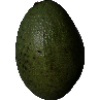

In [103]:
roses = list(data_dir.glob('Alpukat/*'))
PIL.Image.open(str(roses[3]))

In [104]:
batch_size = 32
img_height = 180
img_width = 180

In [105]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10017 files belonging to 52 classes.
Using 8014 files for training.


In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10017 files belonging to 52 classes.
Using 2003 files for validation.


In [115]:
class_names = train_ds.class_names
print(class_names)
# print(class_names.length)

['Alpukat', 'Anggur', 'Apel', 'Asinan', 'Ayam Goreng', 'Bawang Bombay', 'Bawang Merah', 'Bawang Putih', 'Bayam', 'Bika Ambon', 'Bit', 'Bubur', 'Bunga Kol', 'Cabai', 'Gado-Gado', 'Gudeg', 'Gulai Ikan', 'Jagung', 'Jahe', 'Jambu Biji', 'Jeruk', 'Kacang Kedelai', 'Kacang Kolong', 'Kentang', 'Kubis', 'Kue Lumpur', 'Lemon', 'Lobak', 'Mangga', 'Nanas', 'Nasi Goreng', 'Pempek', 'Pir', 'Pisang', 'Rambutan', 'Rawon', 'Rendang', 'Rujak Cingur', 'Salak', 'Sate Ayam', 'Sayur Daun Singkong', 'Selada', 'Semangka', 'Soto Ayam', 'Soto Banjar', 'Tahu Telur', 'Tekwan', 'Terong', 'Timun', 'Tomat', 'Ubi', 'Wortel']


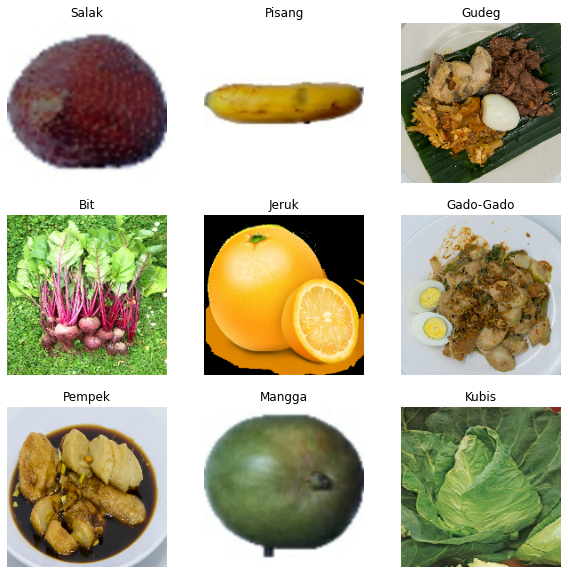

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [49]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [50]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [51]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.03950619 1.0


In [53]:
num_classes = 52

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [56]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
251/251 [==============================] - 557s 2s/step - loss: 1.4160 - accuracy: 0.6545 - val_loss: 0.7610 - val_accuracy: 0.8038
Epoch 2/5
251/251 [==============================] - 254s 1s/step - loss: 0.5854 - accuracy: 0.8413 - val_loss: 0.6262 - val_accuracy: 0.8342
Epoch 3/5
251/251 [==============================] - 254s 1s/step - loss: 0.3237 - accuracy: 0.9058 - val_loss: 0.6846 - val_accuracy: 0.8417
Epoch 4/5
251/251 [==============================] - 254s 1s/step - loss: 0.1714 - accuracy: 0.9493 - val_loss: 0.6015 - val_accuracy: 0.8657
Epoch 5/5
251/251 [==============================] - 253s 1s/step - loss: 0.0881 - accuracy: 0.9737 - val_loss: 0.7899 - val_accuracy: 0.8612


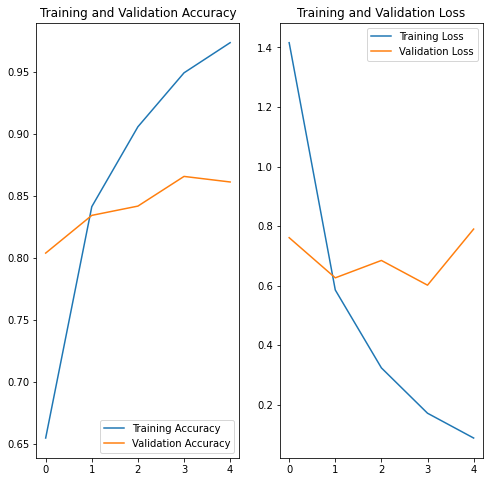

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Coba Augmentasi Data

In [59]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

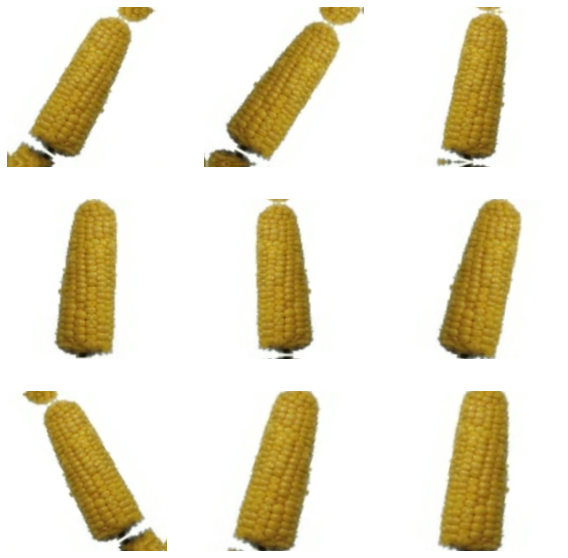

In [60]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [69]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

In [72]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
251/251 [==============================] - 295s 1s/step - loss: 1.6907 - accuracy: 0.5711 - val_loss: 0.8539 - val_accuracy: 0.7733
Epoch 2/10
251/251 [==============================] - 292s 1s/step - loss: 0.7163 - accuracy: 0.8092 - val_loss: 0.6905 - val_accuracy: 0.8283
Epoch 3/10
251/251 [==============================] - 292s 1s/step - loss: 0.5566 - accuracy: 0.8443 - val_loss: 0.5667 - val_accuracy: 0.8497
Epoch 4/10
251/251 [==============================] - 291s 1s/step - loss: 0.4634 - accuracy: 0.8682 - val_loss: 0.6082 - val_accuracy: 0.8402
Epoch 5/10
251/251 [==============================] - 291s 1s/step - loss: 0.4122 - accuracy: 0.8766 - val_loss: 0.4634 - val_accuracy: 0.8812
Epoch 6/10
251/251 [==============================] - 291s 1s/step - loss: 0.3829 - accuracy: 0.8848 - val_loss: 0.4785 - val_accuracy: 0.8717
Epoch 7/10
251/251 [==============================] - 291s 1s/step - loss: 0.3488 - accuracy: 0.8946 - val_loss: 0.4872 - val_accuracy: 0.8802

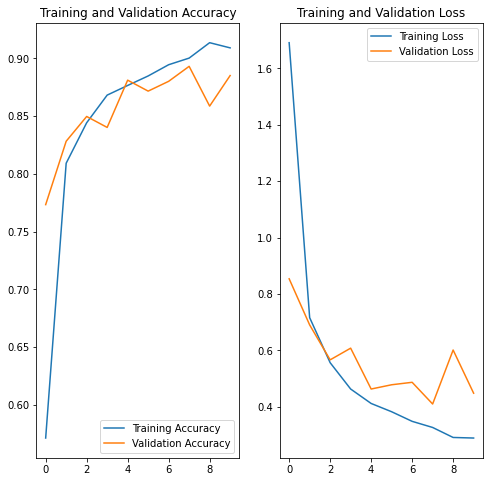

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [120]:
jagung_url = "https://cdn0-production-images-kly.akamaized.net/326OCf1DXmulSc3oWDrRF9jR9yY=/640x480/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/3050165/original/039991900_1581654641-agriculture-bright-cereal-close-up-547263.jpg"
jagung_path = tf.keras.utils.get_file('jagung', origin=jagung_url)

img = keras.preprocessing.image.load_img(
    jagung_path, target_size=(180, 180)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

32768/25417 [======================================] - 0s 8us/step
This image most likely belongs to Jagung with a 74.76 percent confidence.
